# **Load The Dataset.**

In [64]:
# Reading Customer Dataset

import pandas as pd
data1=pd.read_csv("/content/customer_data (2).csv")
data1

,Customer_ID,Customer_Name,Age,Location,Registration_Date
0,CUST1,Customer_1,58,Chicago,2024-05-12 15:25:29.766668
1,CUST2,Customer_2,25,New York,2022-06-05 15:25:29.766686
2,CUST3,Customer_3,19,Phoenix,2024-10-19 15:25:29.766689
3,CUST4,Customer_4,65,Los Angeles,2024-11-20 15:25:29.766693
4,CUST5,Customer_5,35,San Diego,2024-02-19 15:25:29.766696
...,...,...,...,...,...
4995,CUST4996,Customer_4996,69,Dallas,2024-05-31 15:25:29.778671
4996,CUST4997,Customer_4997,20,San Antonio,2023-02-16 15:25:29.778674
4997,CUST4998,Customer_4998,36,Los Angeles,2023-04-11 15:25:29.778677
4998,CUST4999,Customer_4999,19,New York,2024-09-23 15:25:29.778680


In [65]:
# Reading Product Dataset

import pandas as pd
data2=pd.read_csv("/content/product_data.csv")
data2

,Product_ID,Product_Name,Category,Price,Stock
0,PROD1,Product_1,Furniture,500,25
1,PROD2,Product_2,Books,66,65
2,PROD3,Product_3,Sports,122,68
3,PROD4,Product_4,Clothing,68,82
4,PROD5,Product_5,Beauty,37,54
...,...,...,...,...,...
195,PROD196,Product_196,Electronics,276,25
196,PROD197,Product_197,Furniture,369,48
197,PROD198,Product_198,Beauty,185,61
198,PROD199,Product_199,Electronics,437,71


In [66]:
# Reading Sales Dataset

import pandas as pd
data3=pd.read_csv("/content/sales_data (7).csv")
data3

,Transaction_ID,Customer_ID,Product_ID,Quantity,Purchase_Date,Total_Amount
0,TRAN1,CUST428,PROD80,5,2024-07-17 15:25:29.819781,70
1,TRAN2,CUST3172,PROD146,1,2022-12-24 15:25:29.819796,220
2,TRAN3,CUST3091,PROD93,5,2023-06-30 15:25:29.819799,90
3,TRAN4,CUST1026,PROD105,3,2024-08-08 15:25:29.819801,174
4,TRAN5,CUST3521,PROD45,1,2024-07-16 15:25:29.819803,267
...,...,...,...,...,...,...
19995,TRAN19996,CUST4072,PROD4,3,2022-08-11 15:25:29.866504,204
19996,TRAN19997,CUST1663,PROD185,2,2023-12-09 15:25:29.866505,928
19997,TRAN19998,CUST625,PROD93,5,2023-03-09 15:25:29.866507,90
19998,TRAN19999,CUST2062,PROD32,5,2024-04-09 15:25:29.866508,485


# **1.** **Data Understanding & Preprocessing:**



In [67]:
# 1. Reviewing and cleaning the dataset by handling missing values and outliers.

import pandas as pd
import numpy as np

# Function to handle missing values
def handle_missing_values(df):

  # For numerical features, replace missing values with the median
  numerical_cols = df.select_dtypes(include=np.number).columns
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

  # For categorical features, replace missing values with the most frequent value
  categorical_cols = df.select_dtypes(include=['object']).columns
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

  return df

# Clean the datasets.
data1_cleaned = handle_missing_values(data1)
data2_cleaned = handle_missing_values(data2)
data3_cleaned = handle_missing_values(data3)

In [68]:
# Function to handle outliers using IQR method
def handle_outliers_iqr(df, column):

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

data1_cleaned = handle_outliers_iqr(data1_cleaned, 'Age')
data2_cleaned = handle_outliers_iqr(data2_cleaned, 'Price')
data3_cleaned = handle_outliers_iqr(data3_cleaned, 'Quantity')

In [69]:
# Display cleaned datasets.
print("Cleaned Customer Data:")
display(data1_cleaned)

Cleaned Customer Data:


,Customer_ID,Customer_Name,Age,Location,Registration_Date
0,CUST1,Customer_1,58,Chicago,2024-05-12 15:25:29.766668
1,CUST2,Customer_2,25,New York,2022-06-05 15:25:29.766686
2,CUST3,Customer_3,19,Phoenix,2024-10-19 15:25:29.766689
3,CUST4,Customer_4,65,Los Angeles,2024-11-20 15:25:29.766693
4,CUST5,Customer_5,35,San Diego,2024-02-19 15:25:29.766696
...,...,...,...,...,...
4995,CUST4996,Customer_4996,69,Dallas,2024-05-31 15:25:29.778671
4996,CUST4997,Customer_4997,20,San Antonio,2023-02-16 15:25:29.778674
4997,CUST4998,Customer_4998,36,Los Angeles,2023-04-11 15:25:29.778677
4998,CUST4999,Customer_4999,19,New York,2024-09-23 15:25:29.778680


In [70]:
print("\nCleaned Product Data:")
display(data2_cleaned)


Cleaned Product Data:


,Product_ID,Product_Name,Category,Price,Stock
0,PROD1,Product_1,Furniture,500,25
1,PROD2,Product_2,Books,66,65
2,PROD3,Product_3,Sports,122,68
3,PROD4,Product_4,Clothing,68,82
4,PROD5,Product_5,Beauty,37,54
...,...,...,...,...,...
195,PROD196,Product_196,Electronics,276,25
196,PROD197,Product_197,Furniture,369,48
197,PROD198,Product_198,Beauty,185,61
198,PROD199,Product_199,Electronics,437,71


In [71]:
print("\nCleaned Sales Data:")
display(data3_cleaned)


Cleaned Sales Data:


,Transaction_ID,Customer_ID,Product_ID,Quantity,Purchase_Date,Total_Amount
0,TRAN1,CUST428,PROD80,5,2024-07-17 15:25:29.819781,70
1,TRAN2,CUST3172,PROD146,1,2022-12-24 15:25:29.819796,220
2,TRAN3,CUST3091,PROD93,5,2023-06-30 15:25:29.819799,90
3,TRAN4,CUST1026,PROD105,3,2024-08-08 15:25:29.819801,174
4,TRAN5,CUST3521,PROD45,1,2024-07-16 15:25:29.819803,267
...,...,...,...,...,...,...
19995,TRAN19996,CUST4072,PROD4,3,2022-08-11 15:25:29.866504,204
19996,TRAN19997,CUST1663,PROD185,2,2023-12-09 15:25:29.866505,928
19997,TRAN19998,CUST625,PROD93,5,2023-03-09 15:25:29.866507,90
19998,TRAN19999,CUST2062,PROD32,5,2024-04-09 15:25:29.866508,485


Customer Data (data1_cleaned) - EDA:


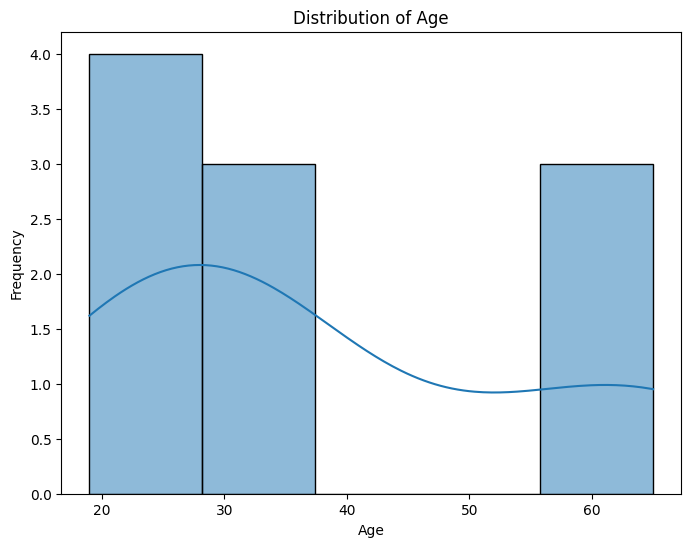

In [72]:
#2. Performed exploratory data analysis (EDA) to understand data distribution.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Customer Data (data1_cleaned) ---
print("Customer Data (data1_cleaned) - EDA:")

# Numerical features distribution
numerical_features_data1 = data1_cleaned.select_dtypes(include=np.number).columns
for feature in numerical_features_data1:
    plt.figure(figsize=(8, 6))
    sns.histplot(data1_cleaned[feature].head(10), kde=True)  # Histogram with KDE
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

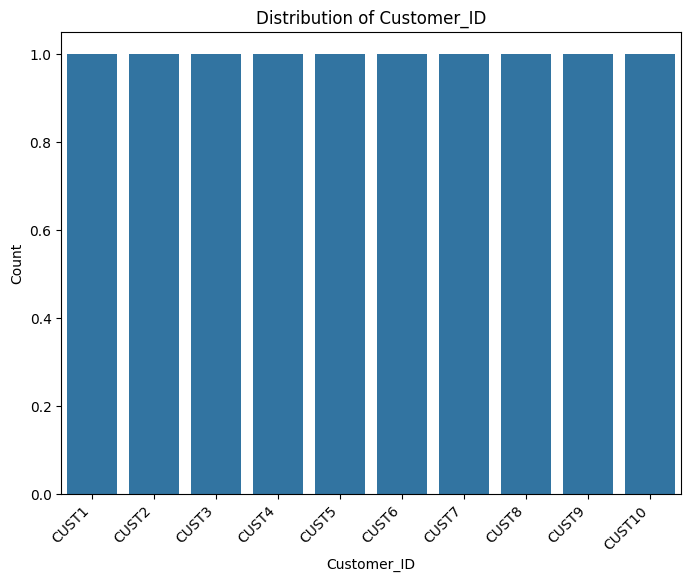

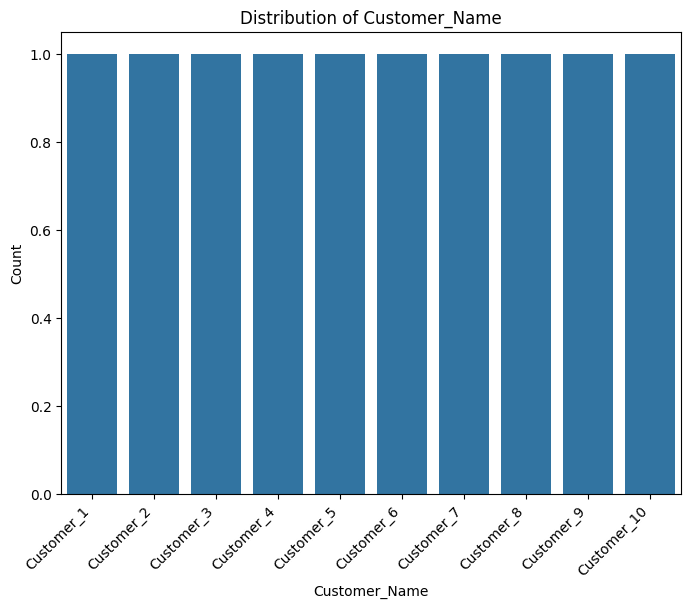

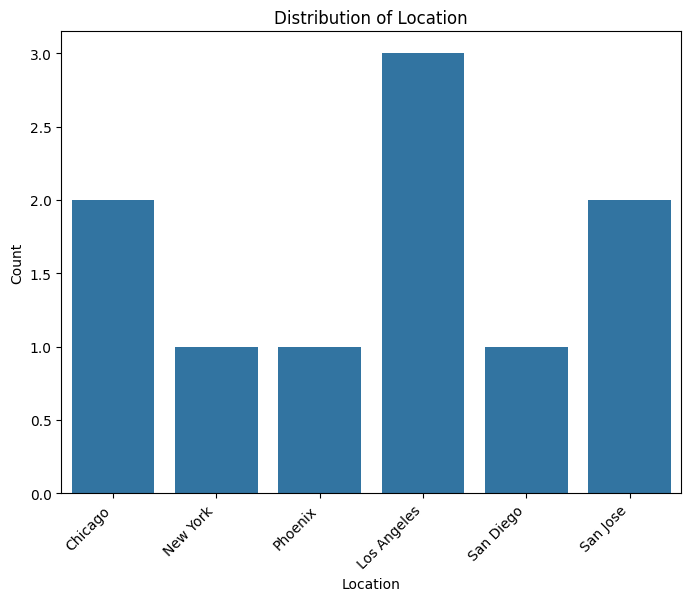

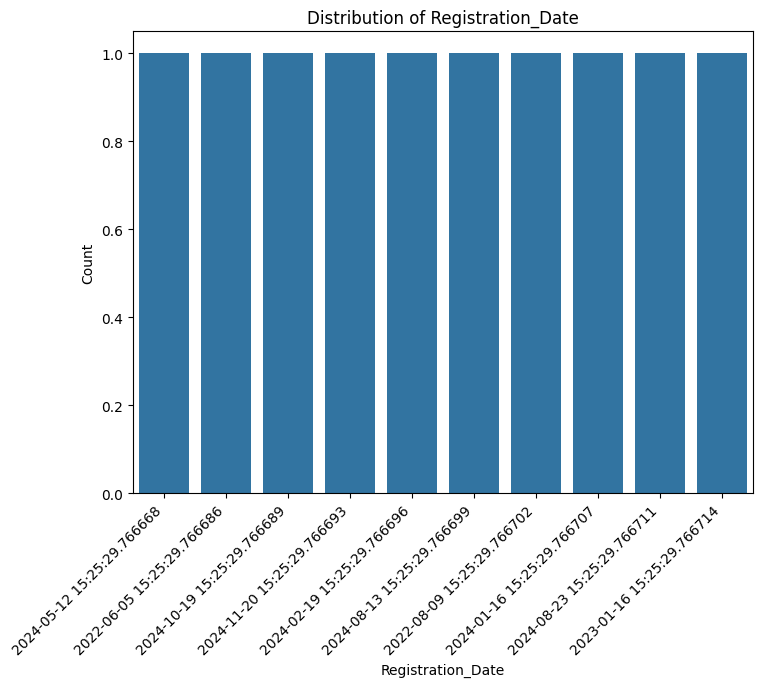

In [73]:
# Categorical features distribution
categorical_features_data1 = data1_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features_data1:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data1_cleaned.head(10))  # Count plot
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


Product Data (data2_cleaned) - EDA:


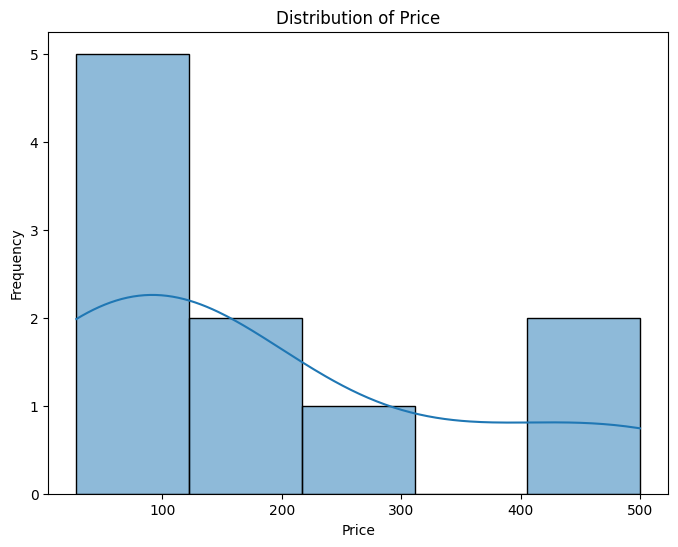

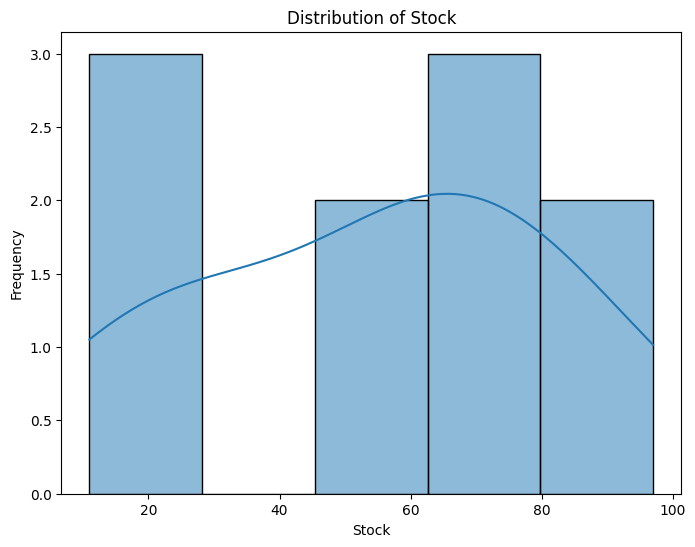

In [74]:
# --- Product Data (data2_cleaned) ---
print("\nProduct Data (data2_cleaned) - EDA:")

# Numerical features distribution
numerical_features_data2 = data2_cleaned.select_dtypes(include=np.number).columns
for feature in numerical_features_data2:
    plt.figure(figsize=(8, 6))
    sns.histplot(data2_cleaned[feature].head(10), kde=True)  # Histogram with KDE
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

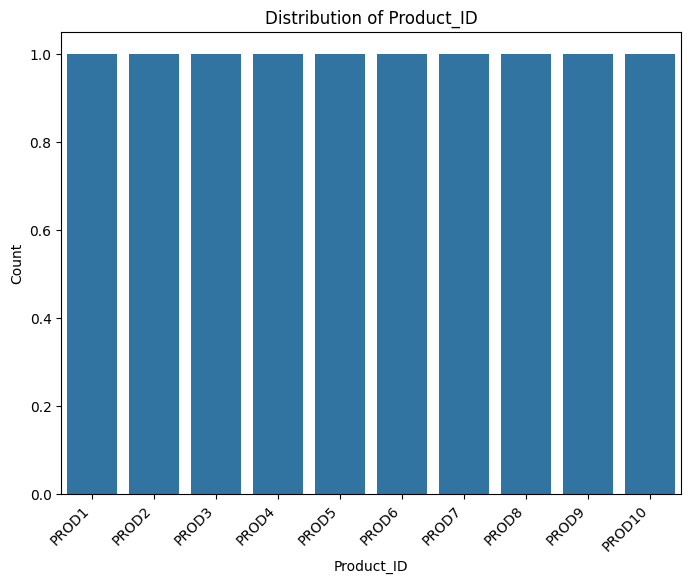

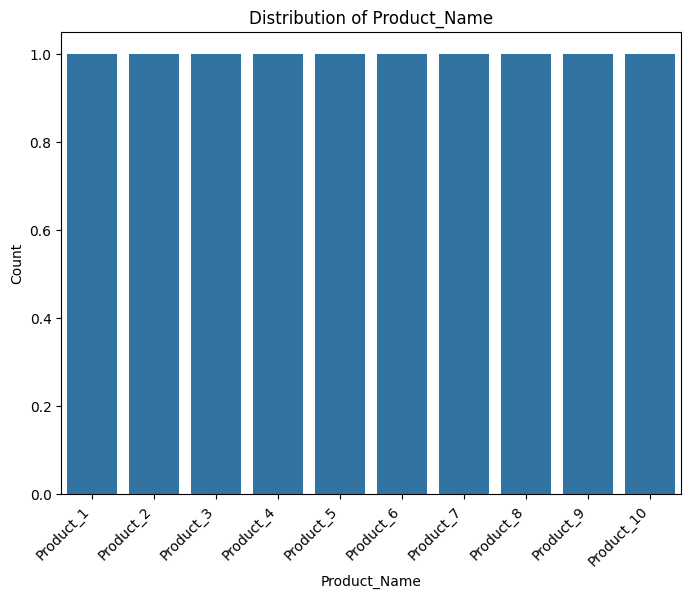

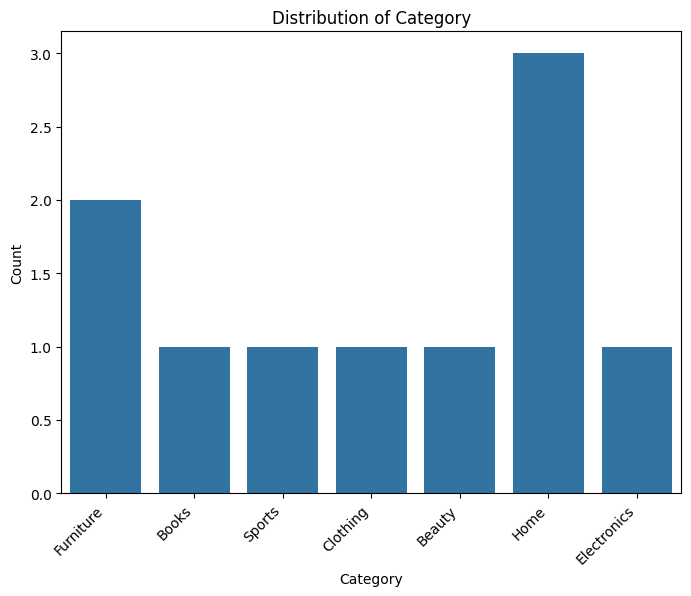

In [75]:
# Categorical features distribution
categorical_features_data2 = data2_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features_data2:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data2_cleaned.head(10))  # Count plot
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


Sales Data (data3_cleaned) - EDA:


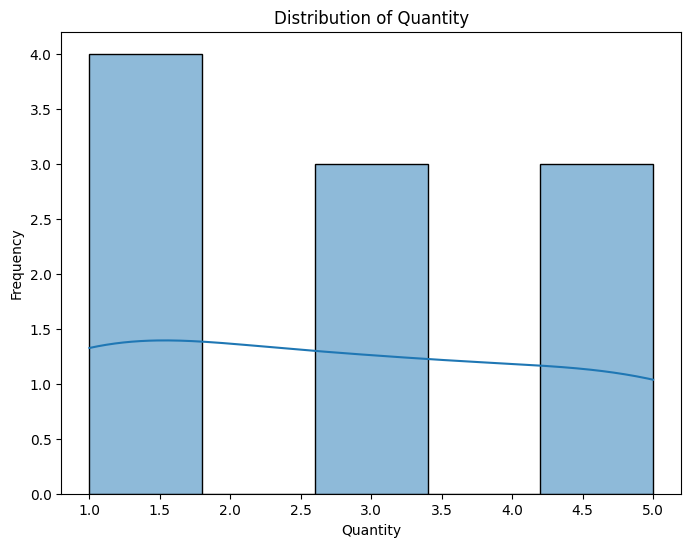

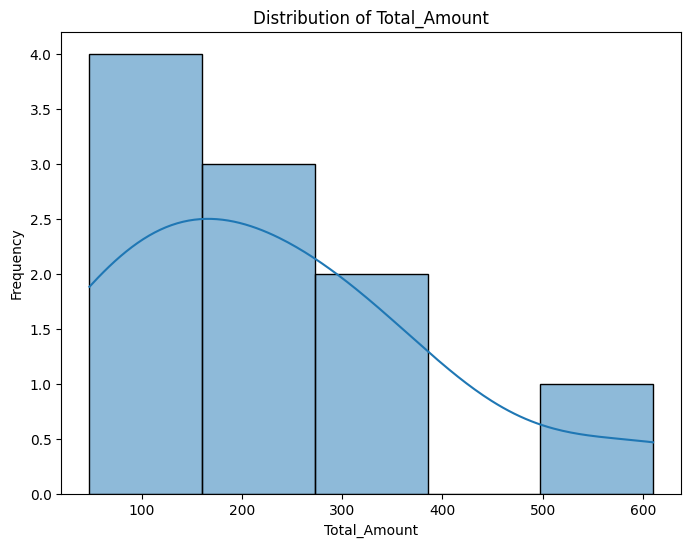

In [76]:
# --- Sales Data (data3_cleaned) ---
print("\nSales Data (data3_cleaned) - EDA:")

# ----- As data is very much, so visualizing for first 10 data points for better viz. -----

# Numerical features distribution
numerical_features_data3 = data3_cleaned.select_dtypes(include=np.number).columns
for feature in numerical_features_data3:
    plt.figure(figsize=(8, 6))
    sns.histplot(data3_cleaned[feature].head(10), kde=True)  # Histogram with KDE
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

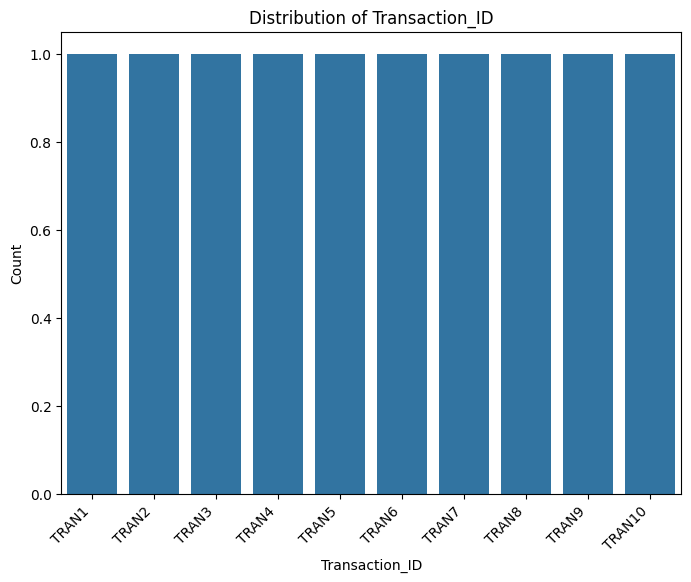

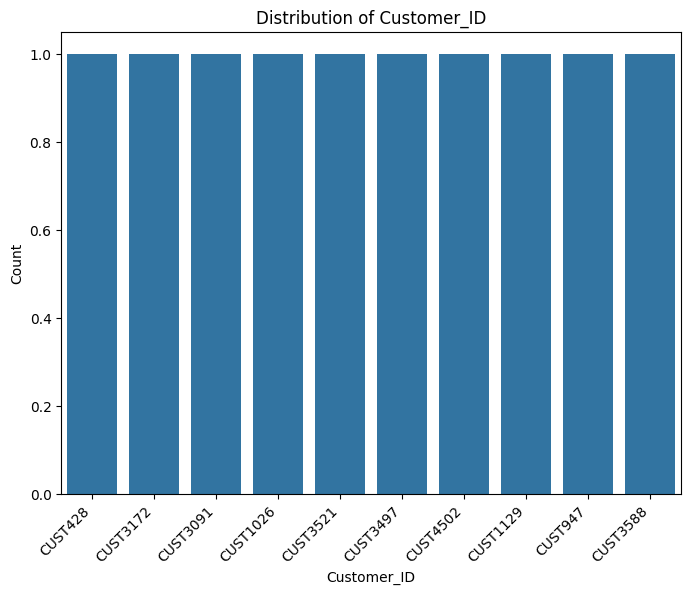

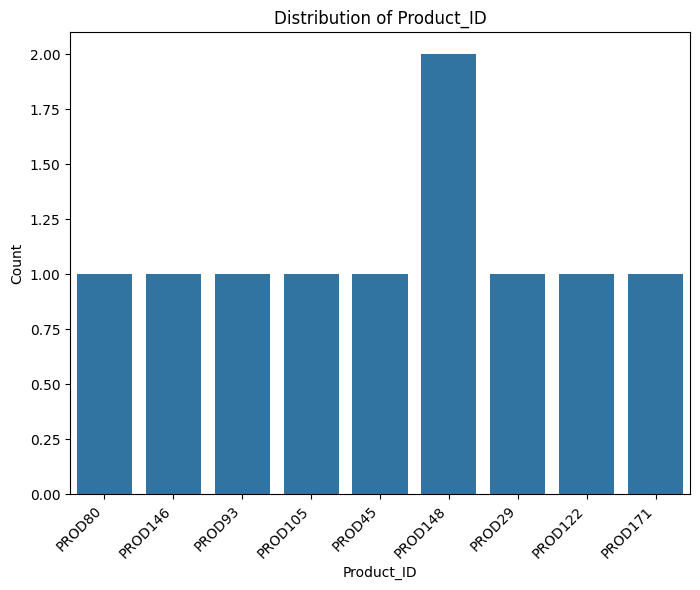

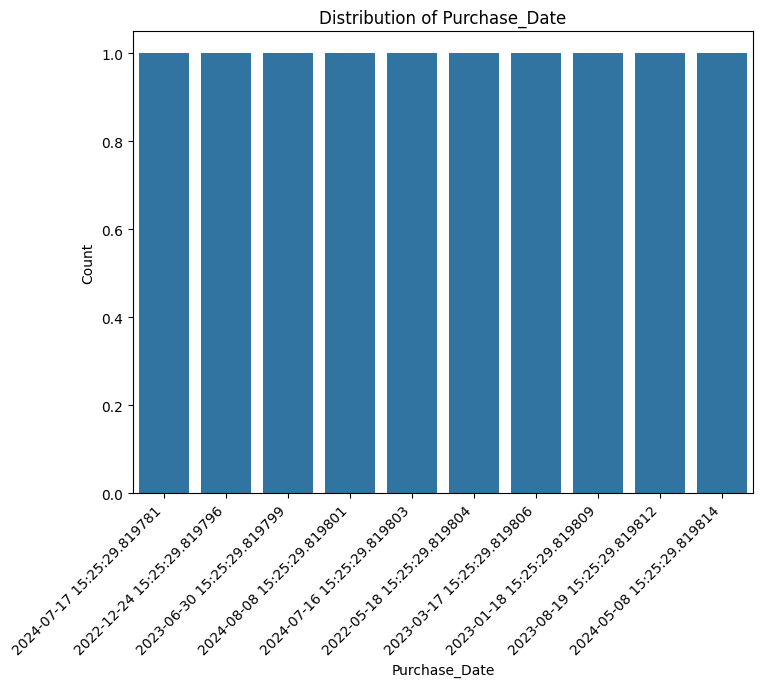

In [77]:
# Categorical features distribution
categorical_features_data3 = data3_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features_data3:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data3_cleaned.head(10))  # Count plot
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [78]:
# 3. Ensuring data is structured appropriately for further analysis.

import pandas as pd

# --- Check Data Types ---
print("Data Types:")
print("Customer Data:")
print(data1_cleaned.dtypes)
print("\nProduct Data:")
print(data2_cleaned.dtypes)
print("\nSales Data:")
print(data3_cleaned.dtypes)

Data Types:
Customer Data:
Customer_ID          object
Customer_Name        object
Age                   int64
Location             object
Registration_Date    object
dtype: object

Product Data:
Product_ID      object
Product_Name    object
Category        object
Price            int64
Stock            int64
dtype: object

Sales Data:
Transaction_ID    object
Customer_ID       object
Product_ID        object
Quantity           int64
Purchase_Date     object
Total_Amount       int64
dtype: object


In [79]:
# --- Handle Inconsistent Data ---
# Converted 'Purchase Date' to datetime in data3_cleaned
data3_cleaned['Purchase_Date'] = pd.to_datetime(data3_cleaned['Purchase_Date'], errors='coerce')

In [80]:
# --- Restructure Data ---
merged_data = pd.merge(data3_cleaned, data1_cleaned, on='Customer_ID', how='left')
merged_data = pd.merge(merged_data, data2_cleaned, on='Product_ID', how='left')

In [81]:
# --- Check for Duplicates and Handle Them ---
print("\nDuplicate Rows in Customer Data:", data1_cleaned.duplicated().sum())
print("Duplicate Rows in Product Data:", data2_cleaned.duplicated().sum())
print("Duplicate Rows in Sales Data:", data3_cleaned.duplicated().sum())
# Remove duplicates if necessary:
data1_cleaned.drop_duplicates(inplace=True)
data2_cleaned.drop_duplicates(inplace=True)
data3_cleaned.drop_duplicates(inplace=True)


Duplicate Rows in Customer Data: 0
Duplicate Rows in Product Data: 0
Duplicate Rows in Sales Data: 0


In [82]:
# --- Display Structured Data ---

print("\nStructured Data (Example - Merged Data):")
display(merged_data.head())


Structured Data (Example - Merged Data):


,Transaction_ID,Customer_ID,Product_ID,Quantity,Purchase_Date,Total_Amount,Customer_Name,Age,Location,Registration_Date,Product_Name,Category,Price,Stock
0,TRAN1,CUST428,PROD80,5,2024-07-17 15:25:29.819781,70,Customer_428,50,Houston,2023-06-16 15:25:29.767986,Product_80,Furniture,14,97
1,TRAN2,CUST3172,PROD146,1,2022-12-24 15:25:29.819796,220,Customer_3172,28,San Antonio,2023-09-23 15:25:29.774488,Product_146,Books,220,52
2,TRAN3,CUST3091,PROD93,5,2023-06-30 15:25:29.819799,90,Customer_3091,26,San Diego,2023-04-27 15:25:29.774348,Product_93,Electronics,18,69
3,TRAN4,CUST1026,PROD105,3,2024-08-08 15:25:29.819801,174,Customer_1026,38,San Jose,2023-02-01 15:25:29.769647,Product_105,Books,58,97
4,TRAN5,CUST3521,PROD45,1,2024-07-16 15:25:29.819803,267,Customer_3521,64,Chicago,2022-09-28 15:25:29.775176,Product_45,Toys,267,46


# **2.** **Customer Segmentation Analysis:**

In [83]:
!pip install -q scikit-learn

In [84]:
# 1. Identifying different customer groups based on purchasing habits.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- RFM Analysis ---
# Calculate Recency, Frequency, and Monetary value for each customer
# Convert 'Registration_Date' to datetime before calculating Recency
merged_data['Registration_Date'] = pd.to_datetime(merged_data['Registration_Date'])

rfm_data = merged_data.groupby('Customer_ID').agg({
    'Registration_Date': lambda x: (merged_data['Registration_Date'].max() - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Price': 'sum'  # Monetary
})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

# --- Data Scaling ---
# Scale the RFM values using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# --- K-Means Clustering ---
# Determine the optimal number of clusters (e.g., using the Elbow method)
# (Code for Elbow method is omitted here for brevity)

# Apply K-Means clustering with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# --- Analyze Customer Groups ---
# Analyze the characteristics of each cluster based on RFM values
print("Customer Segmentation Results:")
display(rfm_data.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}))


Customer Segmentation Results:


Recency        Frequency            Monetary        
               mean median      mean median         mean  median
Cluster                                                         
0        258.373423  243.0  5.083263    5.0  1275.953743  1257.0
1        276.060833  270.5  2.407500    2.0   537.549167   539.0
2        756.807903  754.0  3.143465    3.0   754.533739   768.0
3        658.390300  694.0  6.808314    7.0  1828.449192  1771.5

In [85]:
# 2. Using clustering techniques (e.g., K-Means, DBSCAN) or RFM (Recency, Frequency, Monetary) analysis.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- RFM Analysis ---
# Calculate Recency, Frequency, and Monetary value for each customer
merged_data['Purchase_Date'] = pd.to_datetime(merged_data['Purchase_Date'])
merged_data['Registration_Date'] = pd.to_datetime(merged_data['Registration_Date'])

# Calculate Recency
recency = merged_data.groupby('Customer_ID')['Purchase_Date'].max()
recency = (merged_data['Purchase_Date'].max() - recency).dt.days
recency = recency.rename('Recency')

# Calculate Frequency
frequency = merged_data.groupby('Customer_ID')['Transaction_ID'].count()
frequency = frequency.rename('Frequency')

# Calculate Monetary
monetary = merged_data.groupby('Customer_ID')['Price'].sum()
monetary = monetary.rename('Monetary')

# Combine RFM into a single DataFrame
rfm_data = pd.concat([recency, frequency, monetary], axis=1)

# --- Data Scaling ---
# Scale the RFM values using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# --- K-Means Clustering ---
# Determine the optimal number of clusters (e.g., using the Elbow method)
# (Code for Elbow method is omitted here for brevity - you can add it if needed)
# Assuming 4 clusters for now
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# --- Analyze Customer Groups ---
# Analyze the characteristics of each cluster based on RFM values
print("Customer Segmentation Results:")
display(rfm_data.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}))

Customer Segmentation Results:


Recency        Frequency            Monetary        
               mean median      mean median         mean  median
Cluster                                                         
0        161.037598  133.0  4.800786    5.0  1203.164983  1200.5
1        582.939326  552.0  2.285393    2.0   538.249438   505.5
2        156.306540  140.0  2.664169    3.0   603.306540   622.5
3        109.382895   78.5  7.236842    7.0  1944.838158  1878.5

In [86]:
# 3. Providing insights into the most valuable customer groups.

# --- Analyze Customer Groups and Identify Most Valuable ---
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
})

print("Customer Segmentation Results:")
display(cluster_summary)

# Identify the most valuable customer group based on RFM values
most_valuable_cluster = cluster_summary['Monetary']['mean'].idxmax()  # Cluster with highest average Monetary value
print(f"\nMost Valuable Customer Group: Cluster {most_valuable_cluster}")

# Further analysis of the most valuable cluster
most_valuable_customers = rfm_data[rfm_data['Cluster'] == most_valuable_cluster]
print("\nCharacteristics of Most Valuable Customers:")
display(most_valuable_customers[['Recency', 'Frequency', 'Monetary']].describe())


Customer Segmentation Results:


Recency        Frequency            Monetary        
               mean median      mean median         mean  median
Cluster                                                         
0        161.037598  133.0  4.800786    5.0  1203.164983  1200.5
1        582.939326  552.0  2.285393    2.0   538.249438   505.5
2        156.306540  140.0  2.664169    3.0   603.306540   622.5
3        109.382895   78.5  7.236842    7.0  1944.838158  1878.5


Most Valuable Customer Group: Cluster 3

Characteristics of Most Valuable Customers:


,Recency,Frequency,Monetary
count,760.000000,760.000000,760.000000
mean,109.382895,7.236842,1944.838158
std,99.096655,1.316445,387.248728
min,0.000000,5.000000,991.000000
25%,34.750000,6.000000,1683.750000
50%,78.500000,7.000000,1878.500000
75%,159.000000,8.000000,2158.250000
max,563.000000,15.000000,3720.000000


# **3. Product Performance Analysis:**

In [87]:
# 1. Identifying top-selling and least-selling products.

# Top-selling products
top_selling_products = merged_data.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False)
print("Top 10 Selling Products:")
display(top_selling_products.head(10))

# Least-selling products
least_selling_products = merged_data.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=True)
print("\nLeast 10 Selling Products:")
display(least_selling_products.head(10))


Top 10 Selling Products:


,Quantity
Product_Name,
Product_182,391
Product_93,381
Product_176,376
Product_129,369
Product_148,366
Product_192,363
Product_8,363
Product_41,363
Product_121,362



Least 10 Selling Products:


,Quantity
Product_Name,
Product_69,218
Product_158,226
Product_140,234
Product_50,234
Product_25,235
Product_146,235
Product_52,241
Product_42,242
Product_45,242


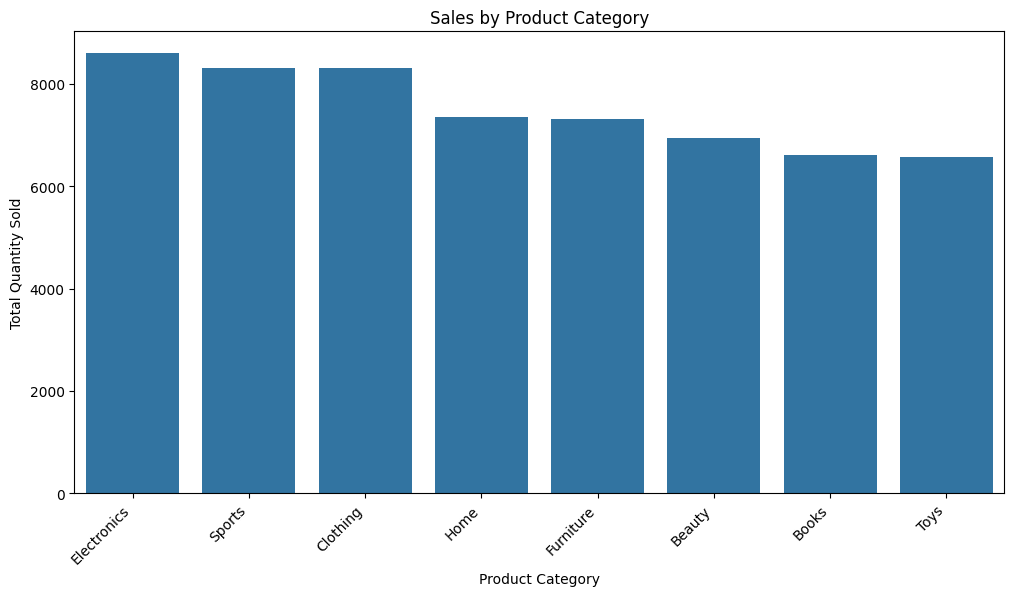

In [88]:
# 2. Analyzing trends in product categories and price ranges.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze trends in product categories.

# Group by product category and sum quantity sold
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Create a bar plot to visualize category sales
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

**10 Best-Selling Products by Revenue:**

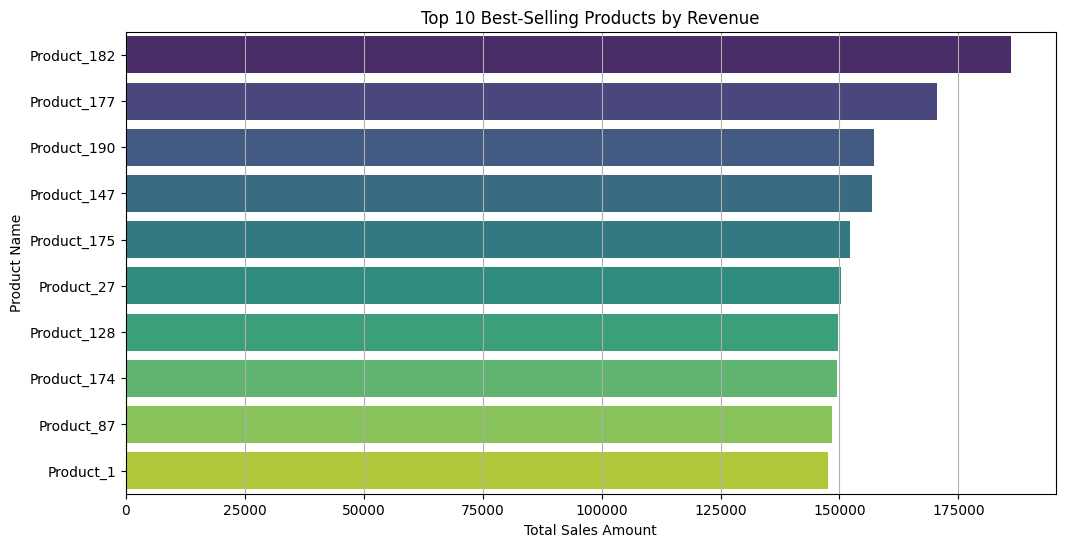

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge sales data with product data to get product names
df_sales_products = data3_cleaned.merge(data2_cleaned, on="Product_ID")
# Aggregate sales by product
top_products = df_sales_products.groupby("Product_Name")["Total_Amount"].sum().nlargest(10).reset_index()

# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(y="Product_Name", x="Total_Amount", data=top_products, hue="Product_Name", palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Best-Selling Products by Revenue")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Name")
plt.grid(axis="x")
plt.show()

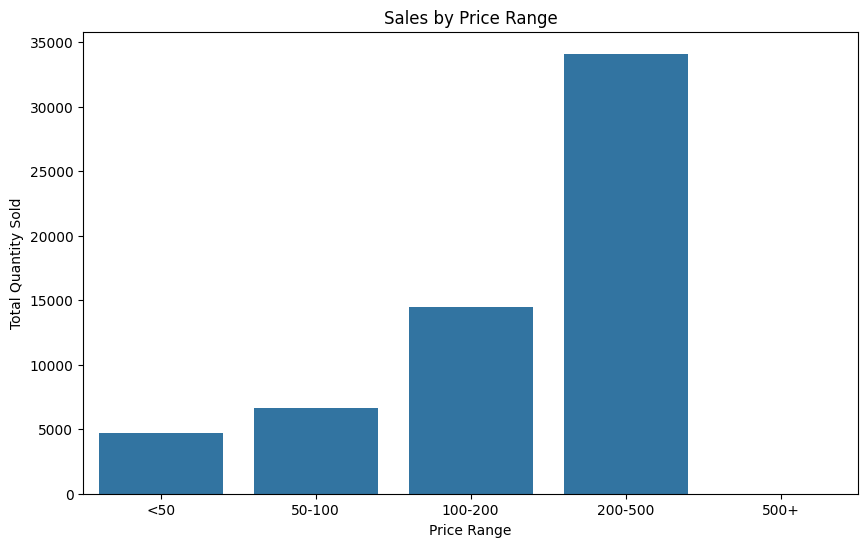

In [90]:
# Analyze trends in price ranges.

# Create price range bins (you can adjust these based on your data)
price_bins = [0, 50, 100, 200, 500, float('inf')]
price_labels = ['<50', '50-100', '100-200', '200-500', '500+']

# Create a new column with price range labels
merged_data['Price_Range'] = pd.cut(merged_data['Price'], bins=price_bins, labels=price_labels)

# Group by price range and sum quantity sold
price_range_sales = merged_data.groupby('Price_Range', observed=True)['Quantity'].sum().sort_values(ascending=True)

# Create a bar plot to visualize price range sales.
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_sales.index, y=price_range_sales.values)
plt.title('Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Quantity Sold')
plt.show()

In [91]:
# 3. Examining how different products perform across various customer segments.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge customer segment information with product data
product_segment_data = pd.merge(merged_data, rfm_data[['Cluster']], on='Customer_ID', how='left')

# Analyze product performance across segments
# Top 5 products for each customer segment
for segment in product_segment_data['Cluster'].unique():
    segment_top_products = product_segment_data[product_segment_data['Cluster'] == segment] \
        .groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(5)
    print(f"\nTop 5 Products for Customer Segment {segment}:")
    display(segment_top_products)


Top 5 Products for Customer Segment 2:


,Quantity
Product_Name,
Product_80,100
Product_11,99
Product_176,96
Product_93,95
Product_103,94



Top 5 Products for Customer Segment 0:


,Quantity
Product_Name,
Product_182,194
Product_129,190
Product_121,185
Product_113,183
Product_114,177



Top 5 Products for Customer Segment 3:


,Quantity
Product_Name,
Product_190,135
Product_128,130
Product_8,126
Product_109,126
Product_156,123



Top 5 Products for Customer Segment 1:


,Quantity
Product_Name,
Product_112,69
Product_14,57
Product_149,54
Product_187,53
Product_176,52


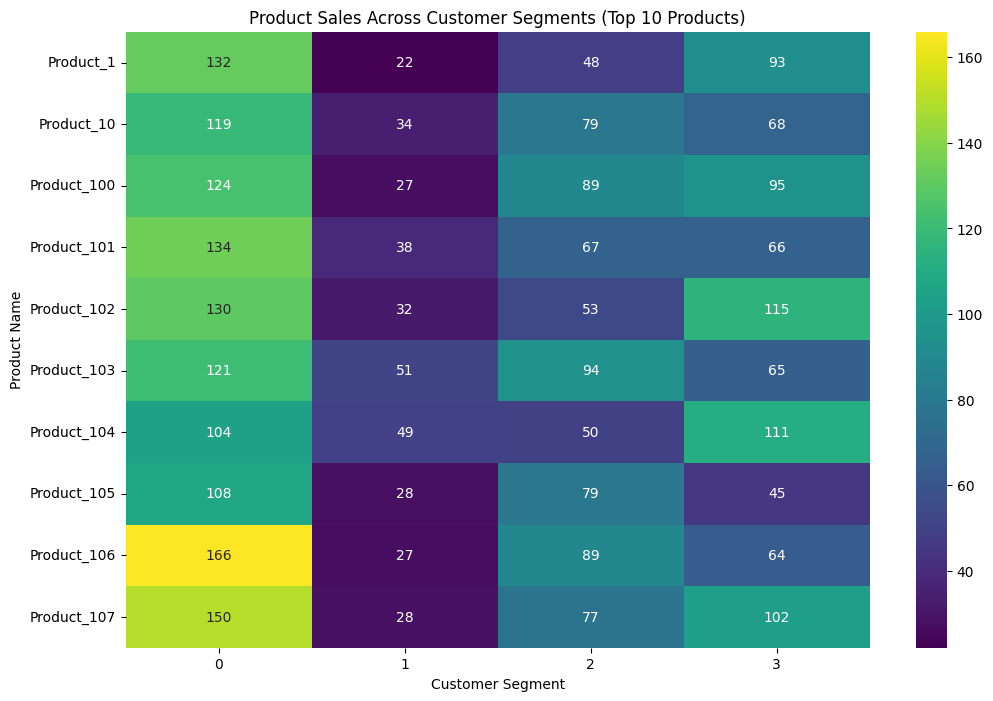

In [92]:
# 3. Visualize product performance across segments

# Heatmap of product sales across segments (for first 10 products)
segment_product_sales = product_segment_data.pivot_table(
    index='Product_Name', columns='Cluster', values='Quantity', aggfunc='sum', fill_value=0
)

# Select the first 10 products for the heatmap
segment_product_sales_top10 = segment_product_sales.head(10)

plt.figure(figsize=(12, 8))
sns.heatmap(segment_product_sales_top10, annot=True, cmap='viridis', fmt='d')
plt.title('Product Sales Across Customer Segments (Top 10 Products)')
plt.xlabel('Customer Segment')
plt.ylabel('Product Name')
plt.show()

# **4. Seasonal Trends & Sales Analysis:**

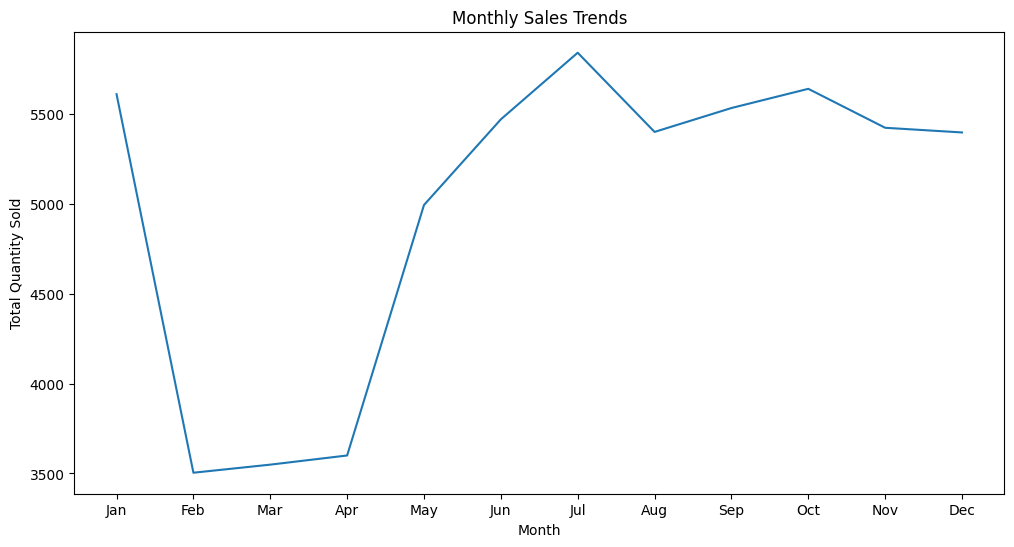

In [93]:
# 1. Identifying peak sales periods (monthly, quarterly, or annually).

import pandas as pd
import matplotlib.pyplot as plt

# Extract month, quarter, and year from 'Purchase_Date'
merged_data['Month'] = merged_data['Purchase_Date'].dt.month
merged_data['Quarter'] = merged_data['Purchase_Date'].dt.quarter
merged_data['Year'] = merged_data['Purchase_Date'].dt.year

# Analyze monthly sales trends
monthly_sales = merged_data.groupby('Month')['Quantity'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

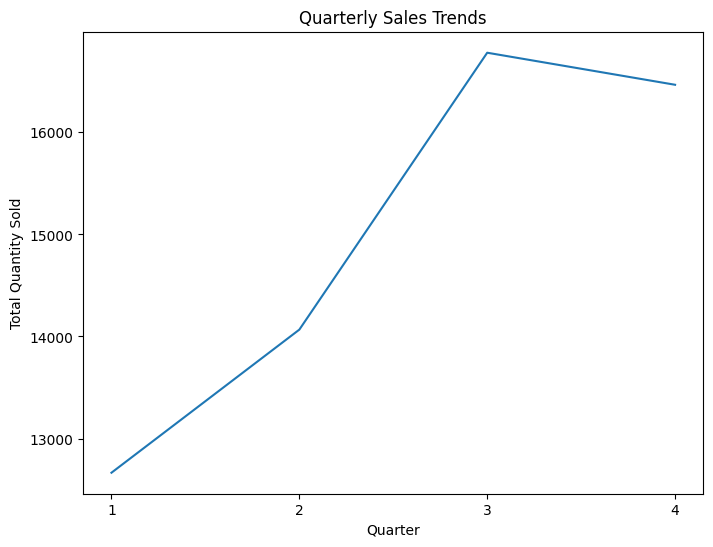

In [94]:
# Analyze quarterly sales trends
quarterly_sales = merged_data.groupby('Quarter')['Quantity'].sum()

# Plot quarterly sales
plt.figure(figsize=(8, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(1, 5))
plt.show()

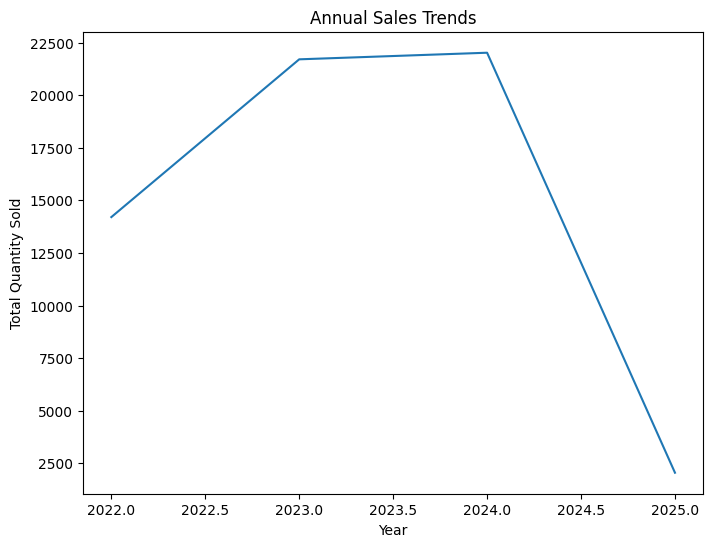

In [95]:
# Analyze annual sales trends
annual_sales = merged_data.groupby('Year')['Quantity'].sum()

# Plot annual sales
plt.figure(figsize=(8, 6))
plt.plot(annual_sales.index, annual_sales.values)
plt.title('Annual Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.show()

In [96]:
# 2. Examining correlations between sales and external factors (e.g., holidays, promotions).

# We want to identify holidays based on specific dates.
# Replace with your actual holiday dates and names
holiday_dates = {
    pd.to_datetime('2023-12-25'): 'Christmas',
    pd.to_datetime('2023-01-01'): 'New Year',
    pd.to_datetime('2023-04-15'): 'April Fools',
    pd.to_datetime('2023-05-30'): 'Labor Day',
    pd.to_datetime('2023-07-04'): 'Independence Day',

}

merged_data['Holiday'] = merged_data['Purchase_Date'].map(holiday_dates).fillna('Non-Holiday')

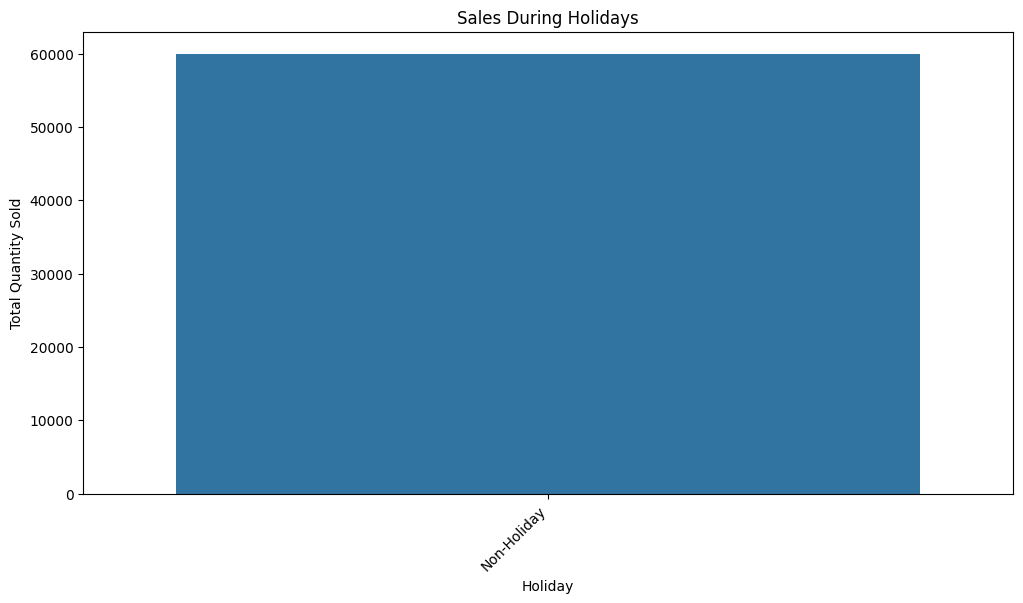

In [97]:
# Analyze Sales During Holidays:
# - Group data by holiday and calculate total sales
holiday_sales = merged_data.groupby('Holiday')['Quantity'].sum().sort_values(ascending=False)

# - Visualize holiday sales
plt.figure(figsize=(12, 6))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Sales During Holidays')
plt.xlabel('Holiday')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

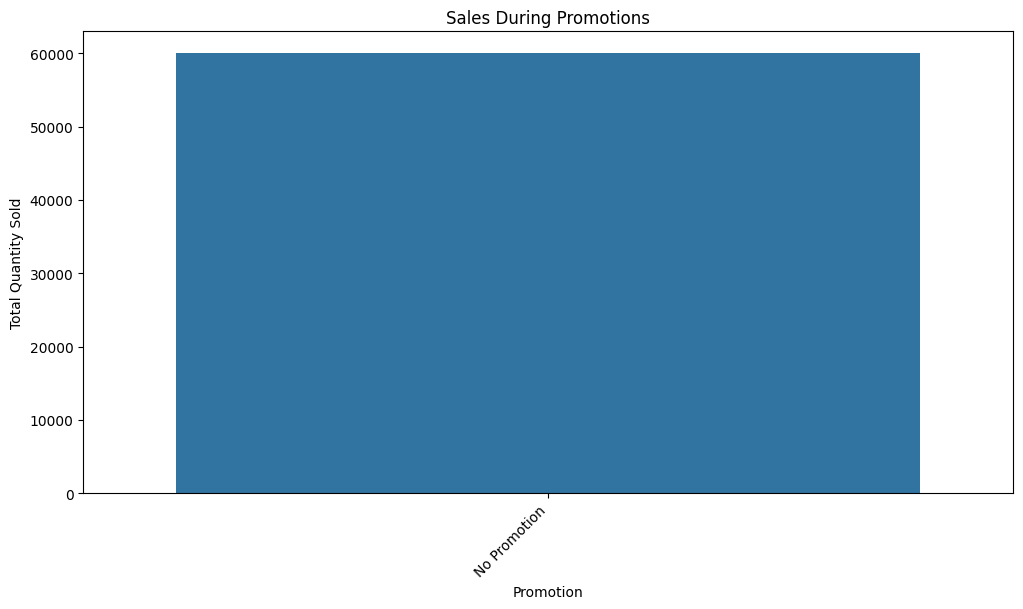

In [98]:
# Analyze Sales During Promotions:

merged_data['Promotion'] = 'No Promotion'  # Default to 'No Promotion'
# Example: If you have a column 'Discount' indicating promotion,
# you could set 'Promotion' to 'Yes' where 'Discount' is greater than 0
# merged_data.loc[merged_data['Discount'] > 0, 'Promotion'] = 'Yes'

promotion_sales = merged_data.groupby('Promotion')['Quantity'].sum().sort_values(ascending=False)

# - Visualize promotion sales
plt.figure(figsize=(12, 6))
sns.barplot(x=promotion_sales.index, y=promotion_sales.values)
plt.title('Sales During Promotions')
plt.xlabel('Promotion')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

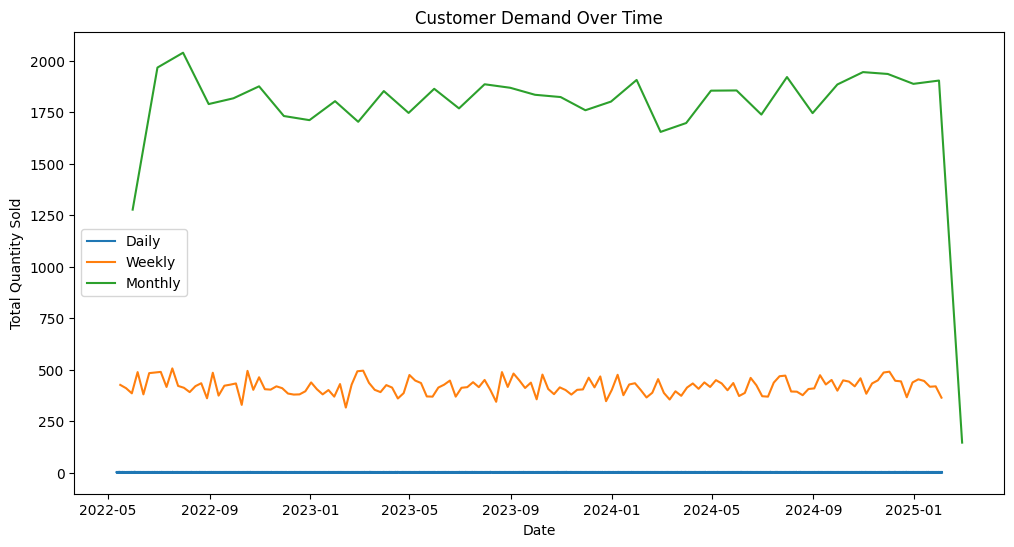

In [99]:
# 3. Determining patterns in customer demand over time.

# Resample data to analyze demand patterns over different time periods Daily demand.
daily_demand = merged_data.groupby('Purchase_Date')['Quantity'].sum()

# Weekly demand (starting on Monday)
weekly_demand = merged_data.resample('W-Mon', on='Purchase_Date')['Quantity'].sum()

# Monthly demand
monthly_demand = merged_data.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Visualize demand patterns
plt.figure(figsize=(12, 6))
plt.plot(daily_demand.index, daily_demand.values, label='Daily')
plt.plot(weekly_demand.index, weekly_demand.values, label='Weekly')
plt.plot(monthly_demand.index, monthly_demand.values, label='Monthly')
plt.title('Customer Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()



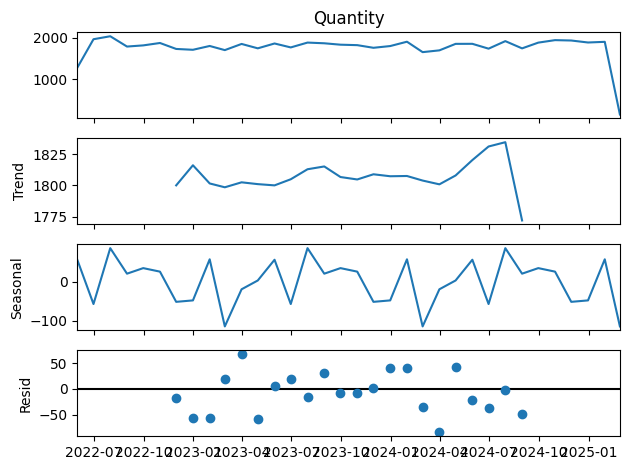

In [100]:
# Analyze seasonality and trends
# You can use seasonal decomposition to identify trends, seasonality, and residuals:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on monthly data (example)
result = seasonal_decompose(monthly_demand, model='additive')
result.plot()
plt.show()

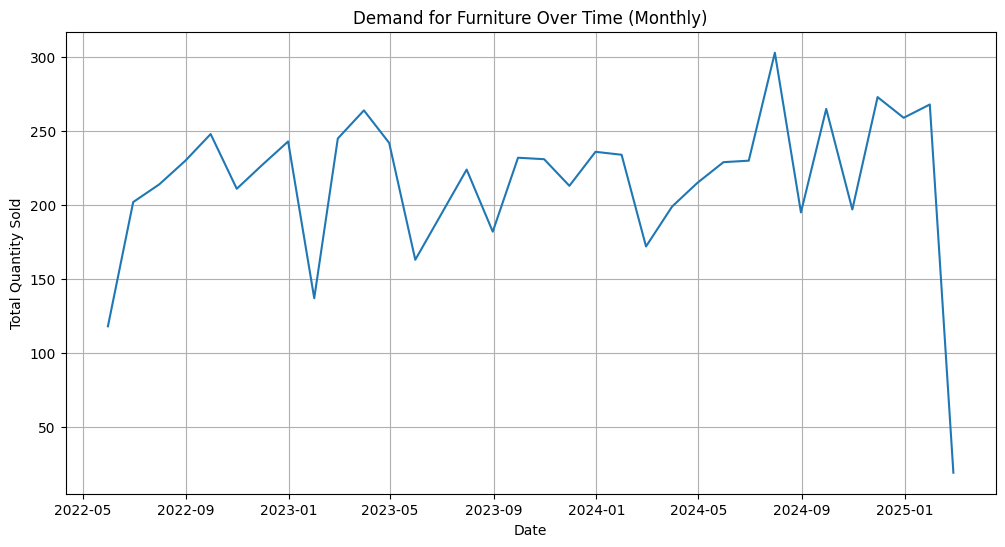

In [101]:
# 5. Further analysis
# - Analyze demand patterns for specific product categories or customer segments.
# - Identify any unusual spikes or dips in demand and investigate their causes.
# - Use time series forecasting techniques to predict future demand.

# Example: Analyzing demand for a specific product category
category_name = 'Furniture'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)  # Add grid for better readability
plt.show()

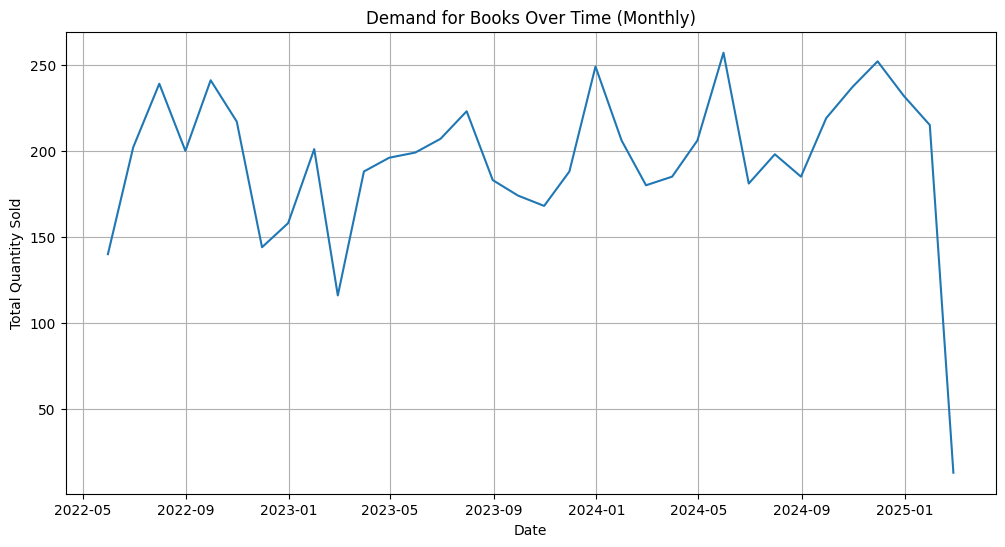

In [102]:
category_name = 'Books'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

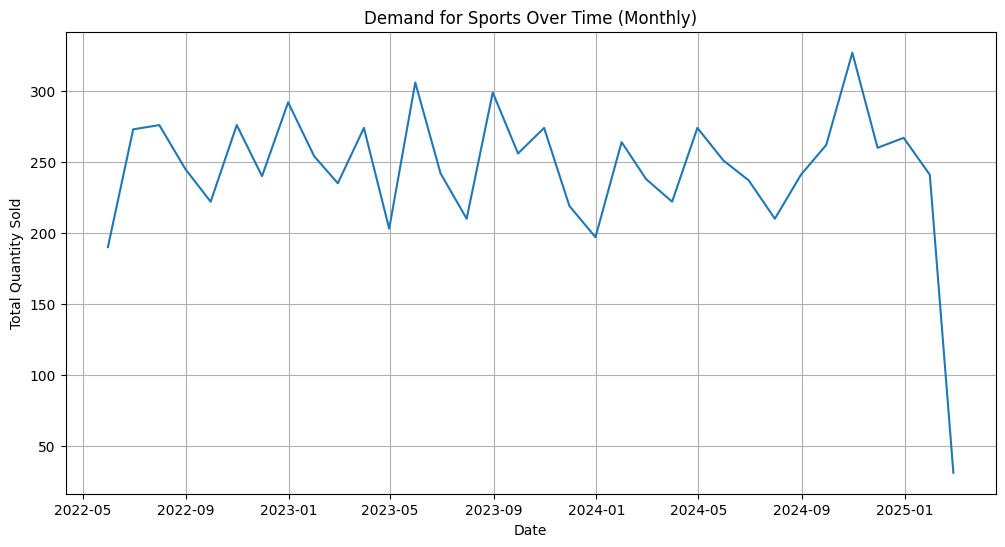

In [103]:
category_name = 'Sports'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

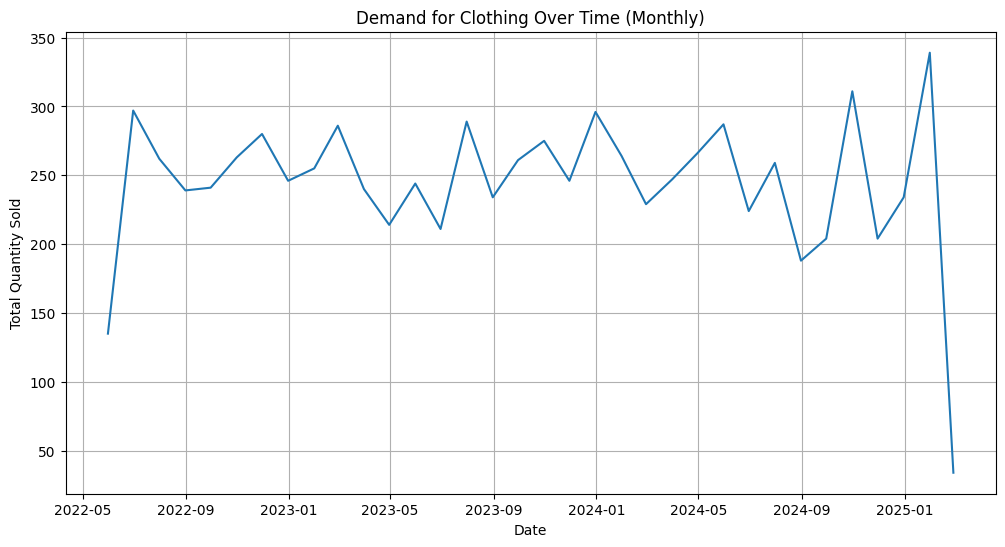

In [104]:
category_name = 'Clothing'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

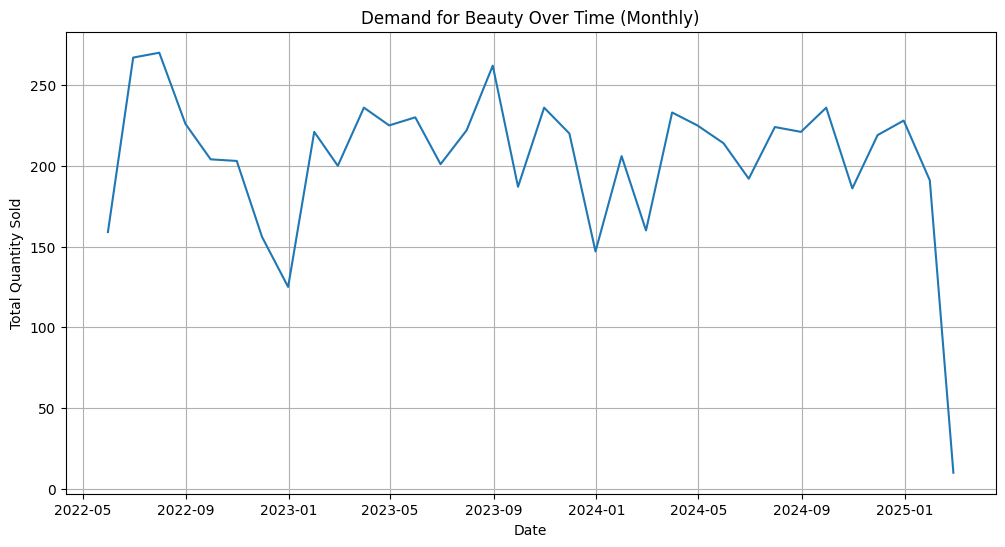

In [105]:
category_name = 'Beauty'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

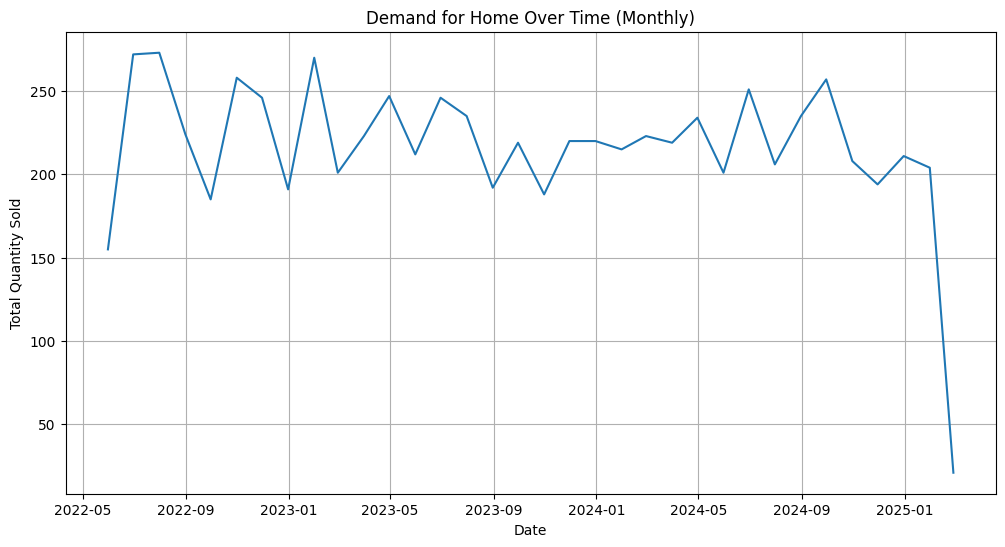

In [106]:
category_name = 'Home'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

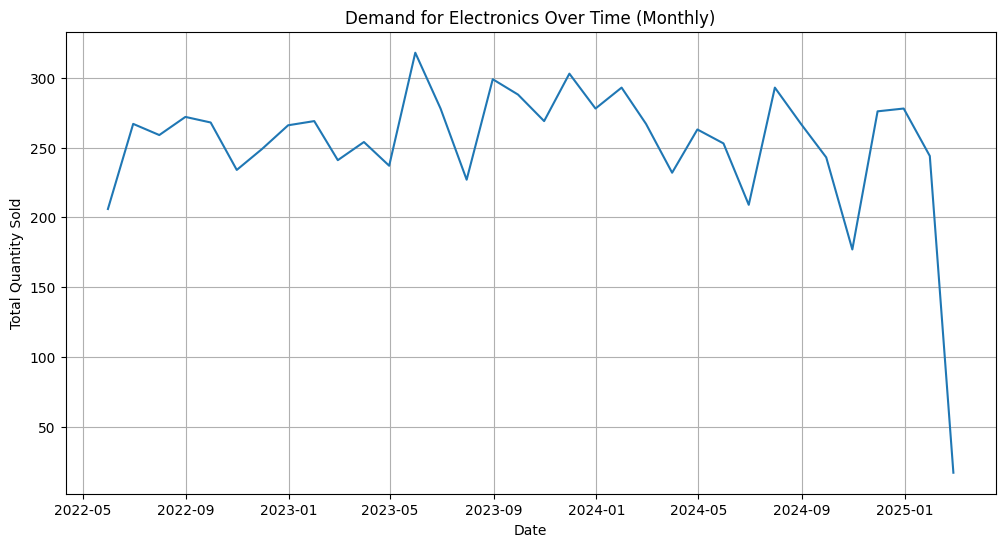

In [107]:
category_name = 'Electronics'

# Filter data for the specific category
category_demand = merged_data[merged_data['Category'] == category_name]

# Resample data to monthly frequency and sum quantity sold
monthly_category_demand = category_demand.resample('ME', on='Purchase_Date')['Quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_category_demand.index, monthly_category_demand.values)
plt.title(f'Demand for {category_name} Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

# **5. Customer Retention & Churn Analysis:**

In [108]:
# 1. Identifying repeat customers versus one-time buyers.

# Calculate the purchase frequency for each customer
customer_purchase_frequency = merged_data.groupby('Customer_ID')['Transaction_ID'].count()

# Create a new column 'Customer_Type' based on purchase frequency
merged_data['Customer_Type'] = merged_data['Customer_ID'].apply(lambda x: 'Repeat' if customer_purchase_frequency[x] > 1 else 'One-Time')

# Display the results
print("Number of Repeat Customers:", merged_data[merged_data['Customer_Type'] == 'Repeat']['Customer_ID'].nunique())
print("Number of One-Time Buyers:", merged_data[merged_data['Customer_Type'] == 'One-Time']['Customer_ID'].nunique())

# You can further analyze these groups, for example, by calculating their average purchase value:
repeat_customer_avg_purchase = merged_data[merged_data['Customer_Type'] == 'Repeat'].groupby('Customer_ID')['Price'].mean().mean()
one_time_buyer_avg_purchase = merged_data[merged_data['Customer_Type'] == 'One-Time'].groupby('Customer_ID')['Price'].mean().mean()

print("Average Purchase Value for Repeat Customers:", repeat_customer_avg_purchase)
print("Average Purchase Value for One-Time Buyers:", one_time_buyer_avg_purchase)

Number of Repeat Customers: 4518
Number of One-Time Buyers: 382
Average Purchase Value for Repeat Customers: 249.6794403275147
Average Purchase Value for One-Time Buyers: 246.5497382198953


In [109]:
# 2. Analyzing factors contributing to customer churn.

# Define churn based on recency of purchase
# Assume customers who haven't purchased in the last 90 days are churned
# You can adjust this threshold based on your business context
merged_data['Churned'] = (merged_data['Purchase_Date'].max() - merged_data['Purchase_Date']).dt.days > 90

# Group customers into churned and retained
churned_customers = merged_data[merged_data['Churned']]
retained_customers = merged_data[~merged_data['Churned']]

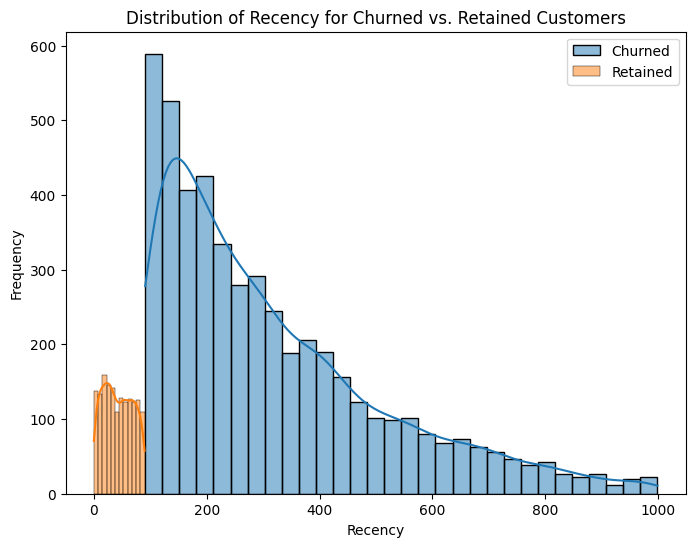

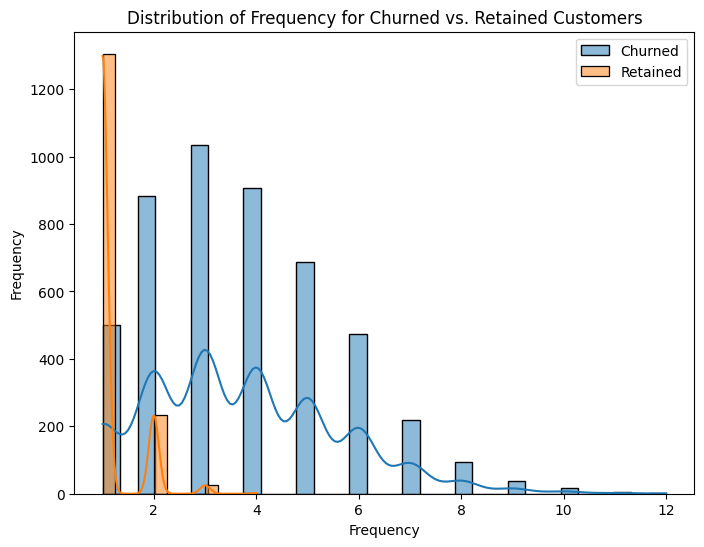

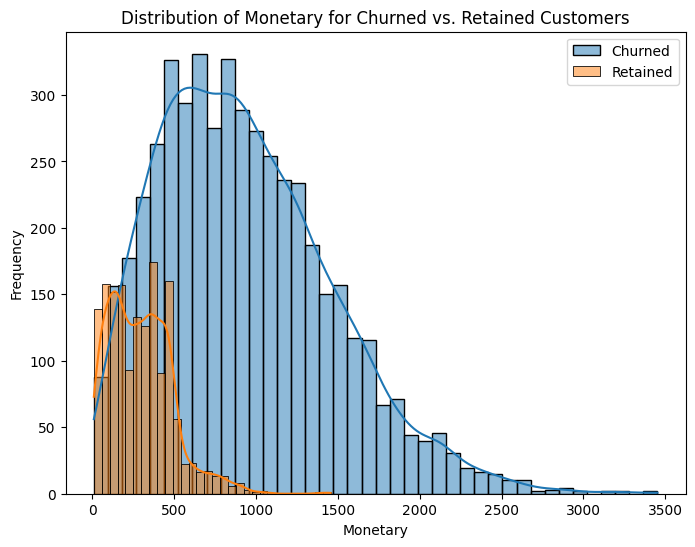

In [110]:
# Analyzed factors contributing to churn
# Recency, Frequency, Monetary (RFM) Analysis
# Calculate RFM values for churned and retained customers
rfm_churned = churned_customers.groupby('Customer_ID').agg({
    'Purchase_Date': lambda x: (merged_data['Purchase_Date'].max() - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Price': 'sum'  # Monetary
})
rfm_churned.columns = ['Recency', 'Frequency', 'Monetary']

rfm_retained = retained_customers.groupby('Customer_ID').agg({
    'Purchase_Date': lambda x: (merged_data['Purchase_Date'].max() - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Price': 'sum'  # Monetary
})
rfm_retained.columns = ['Recency', 'Frequency', 'Monetary']

# Compare RFM distributions for churned and retained customers
for feature in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(8, 6))
    sns.histplot(rfm_churned[feature], label='Churned', kde=True)
    sns.histplot(rfm_retained[feature], label='Retained', kde=True)
    plt.title(f'Distribution of {feature} for Churned vs. Retained Customers')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

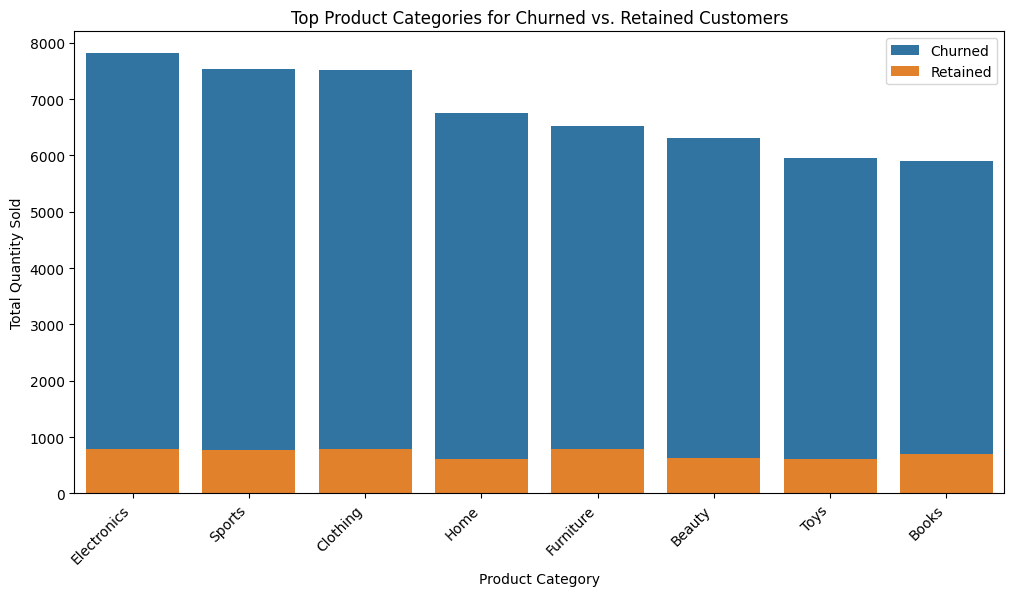

In [111]:
# Product Category Analysis
# Analyze the distribution of product categories purchased by churned and retained customers
category_churned = churned_customers.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
category_retained = retained_customers.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Compare top categories for churned and retained customers
plt.figure(figsize=(12, 6))
sns.barplot(x=category_churned.index[:10], y=category_churned.values[:10], label='Churned')
sns.barplot(x=category_retained.index[:10], y=category_retained.values[:10], label='Retained')
plt.title('Top Product Categories for Churned vs. Retained Customers')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

**Recommend strategies to improve customer retention rates -**

**1. Personalized Communication:**

a. Targeted Emails/Messages: Send personalized emails or messages to
customers based on their purchase history, preferences, and engagement
levels. Offer relevant product recommendations, exclusive deals, or early
access to new arrivals.                                                     
b. Customer Feedback: Regularly collect feedback from customers through
surveys, reviews, or social media interactions. Address concerns promptly
and show that you value their input.


**2. Loyalty Programs:**

a. Rewards and Incentives: Implement a loyalty program to reward repeat
customers with points, discounts, or exclusive perks. This encourages them
to continue purchasing from your business.                                  
b. Tiered Programs: Consider a tiered loyalty program where customers unlock
greater benefits as they spend more or engage more frequently.


**3. Exceptional Customer Service:**

a. Easy Contact Channels: Provide multiple, easily accessible channels for
customers to reach out for support (e.g., phone, email, live chat).              
b. Proactive Support: Identify potential issues or customer pain points and
proactively address them before they lead to churn.


**4. Community Building:**

a. Social Media Engagement: Build a strong online community through social
media. Encourage customer interaction, share valuable content, and respond
to comments and messages.                                                  
b. Events and Workshops: Host online or in-person events or workshops related
to your products or services. This fosters a sense of community and loyalty.

---
Strategies Based on Churn Analysis Insights-

1. Addressing RFM Factors:

a. Recency: If customers are churning due to inactivity, implement strategies to
re-engage them, such as win-back emails, special offers for returning
customers, or reminders about abandoned items in their carts.                  
b. Frequency: If customers are making infrequent purchases, consider offering
subscription boxes, bundled products, or loyalty program incentives to
encourage more frequent purchases.                                           
c. Monetary: If customers with lower spending are churning, offer personalized
recommendations for higher-value items or bundles that align with their
interests.            

2. Product Category Focus:

a. High-Churn Categories: If certain product categories have higher churn rates,
investigate the reasons. It could be due to product quality, pricing, or
customer experience issues. Address these issues and consider offering
incentives or promotions for those categories to encourage repeat purchases.     
b. Low-Churn Categories: Identify categories with low churn rates and promote
them more heavily. They could be key drivers of customer retention.  


3. Demographic Targeting:

a. High-Risk Demographics: If certain demographics are more likely to churn,
tailor your marketing and communication efforts to address their specific
needs and preferences.                                                      
b. Loyal Demographics: Identify demographics with high retention rates and
understand their characteristics. Use this information to target similar
customer profiles.                                                            

● Example Implementations:

○ Win-back Email Campaign: For customers who haven't purchased in 90 days,
send a personalized email offering a special discount or highlighting new
arrivals.                                                              
○ Loyalty Program Bonus Points: Award bonus points to customers who
purchase from a high-churn category or who haven't purchased in a while.         
○ Product Bundles: Offer bundled products or services at a discounted price to
encourage larger purchases and increase frequency.                               
○ Customer Surveys: Conduct surveys to gather feedback on customer
satisfaction and identify areas for improvement.                             

● Important Considerations:         

○ Data-Driven Decisions: Use the insights from your churn analysis to guide
your strategy development and prioritize initiatives.                            
○ Continuous Monitoring and Improvement: Regularly track your customer
retention metrics and adjust your strategies as needed.                          
○ Experimentation: Test different approaches and measure their impact on
retention rates to find the most effective strategies for your business.
By implementing these strategies and continuously adapting your approach based on data and customer feedback, you can significantly improve your customer retention rates and build a more loyal customer base.

In [112]:
# 3. Recommending strategies to improve customer retention rates.

# ----- Please go through pdf's of this project for this point -----

In [113]:
# Downloading the cleaned customer dataset

from google.colab import files

data1_cleaned.to_csv('cleaned_customer_data.csv', index=False)  # Save as CSV

files.download('cleaned_customer_data.csv')  # Trigger download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
# Downloading the cleaned product dataset

from google.colab import files

data2_cleaned.to_csv('cleaned_product_data.csv', index=False)  # Save as CSV

files.download('cleaned_product_data.csv')  # Trigger download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
# Downloading the cleaned sales dataset

from google.colab import files

data3_cleaned.to_csv('cleaned_sales_data.csv', index=False)  # Save as CSV

files.download('cleaned_sales_data.csv')  # Trigger download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>